In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

from functions import show_frame_info, show_column_info, show_box_plot, convert_to_value, show_iqr_histogram, get_stat_dif, fill_address, fill_famsize, fill_fedu, fill_traveltime, fill_pstatus

# show more rows
pd.set_option('display.max_rows', 200)
# show more columns
pd.set_option('display.max_columns', 80)
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('stud_math.csv')

### Рассмотрим какие данные содержит датасет

In [3]:
show_frame_info(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granula

None

Rows amount in dataset - 395
Columns amount in dataset - 30

Ho many passes(Empty values) in dataset
school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64


Всего 30 значений. 3 из них не имеют пропуски. В остальных колонках есть пропущенные значения. 13 количественных(числовых) значений и 17 номинативных

добавим поле counter = 1, его можно будет использовать в подсчете значений при группировке

In [9]:
df['counter'] = 1

### Рассмотрим все поля датасета по отдельности

#### school — аббревиатура школы, в которой учится ученик

INFO FOR COLUMN: school

Column type: object


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

Passes (NAN or Empty values): 0



,school
GP,349
MS,46


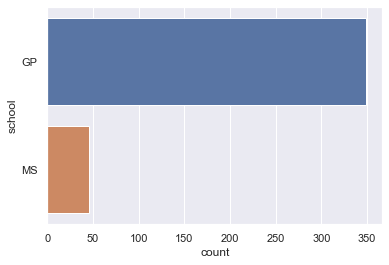

In [5]:
show_column_info(df, 'school')

Пропуски отсутствуют. Школ всего 2. Учащихся в школе GP в 7 раз больше.

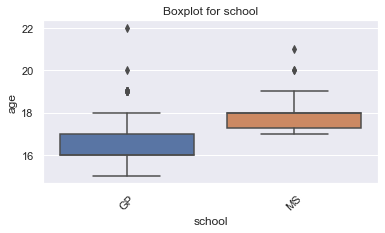

In [6]:
show_box_plot(df, 'school', second_column='age', size_x=6, size_y=3)

в школе с аббревиатурой MS возраст всех учащихся старше 17 лет. Видимо это школа только для детей от 17 лет и старше.

In [7]:
# d = df[df['school'] == 'MS']
# display(d)

#### sex — пол ученика ('F' - женский, 'M' - мужской)

INFO FOR COLUMN: sex

Column type: object


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

Passes (NAN or Empty values): 0



,sex
F,208
M,187


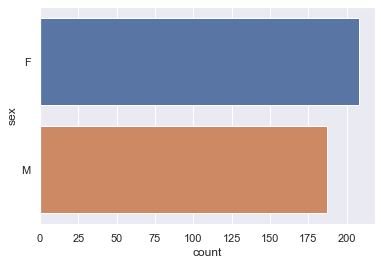

In [8]:
show_column_info(df, 'sex')

Пропуски отсутствуют. Мальчиков и девочек почти равное количество

#### age — возраст ученика (от 15 до 22)

INFO FOR COLUMN: age

Column type: int64


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Passes (NAN or Empty values): 0



,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


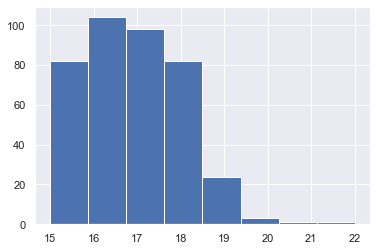

In [9]:
# sns.set(style="darkgrid")
show_column_info(df, 'age', bins=8)

В данном признаке пропуски отсутствуют. В условии сказано, что исследование проводится для возрастной группы 15-22 года,
поэтому выбросы в этом признаке находить не нужно.

#### address — тип адреса ученика ('U' - городской, 'R' - за городом)

INFO FOR COLUMN: address

Column type: object


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

Passes (NAN or Empty values): 17



,address
U,295
R,83
NaN,17


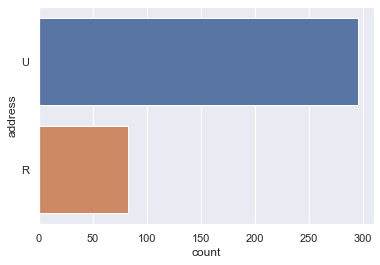

In [10]:
show_column_info(df, 'address')

В этом признаке 17 пропусков. Большинство учащихся живут в городе.
##### Варианты для заполнения пропусков.

In [11]:
display(df[df['address'].isnull()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,counter
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0,1
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0,1
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0,1
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0,1
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0,1
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0,1
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0,1
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0,1
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0,1
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN,1


посмотрим сколько в среднем тратят ученики времени на дорогу в школу

In [12]:
display(df.groupby(['address', 'school']).traveltime.mean())
# display(df[df['school'] == 'GP'].groupby(['address']).traveltime.value_counts())
# display(df[df['school'] == 'MS'].groupby('address').traveltime.value_counts())
# display(df.traveltime.value_counts())

address  school
R        GP        1.672727
         MS        2.190476
U        GP        1.319231
         MS        1.529412
Name: traveltime, dtype: float64

видно, что школа MS находится дальше школы GP. В среднем живущие в городе тратят на дорогу меньше времени. Можно заполнить пропущенные данные исхдя из значения traveltime. Например, если traveltime <= 2, то address = U (городской), если > 2, то address = R (за городом). В тех случаях, где значение traveltime отсутсвует, можно установить наиболее часто встречающееся значение U. Или заполнить по определенной логике пропуски для признака traveltime, а потом дозаполнить address, по логике описанной выше. Либо удалить пустые.

In [13]:
df['address'] = df.apply(lambda x: fill_address(df, x['address'], x['traveltime']), axis=1)

INFO FOR COLUMN: address

Column type: object


count     395
unique      2
top         U
freq      311
Name: address, dtype: object

Passes (NAN or Empty values): 0



,address
U,311
R,84


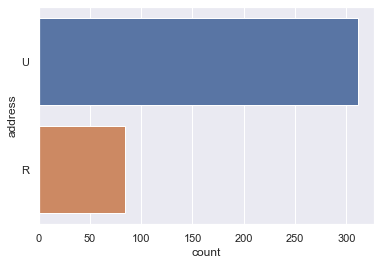

In [14]:
show_column_info(df, 'address')

пропусков больше нет

#### famsize — размер семьи('LE3' <= 3, 'GT3' >3)

INFO FOR COLUMN: famsize

Column type: object


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

Passes (NAN or Empty values): 27



,famsize
GT3,261
LE3,107
NaN,27


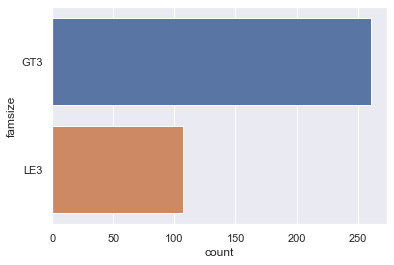

In [17]:
show_column_info(df, 'famsize')

пропусков 27. Размер большинства семей более 3-х человек.
посмотрим как влияет размер семьи на целевую переменную score

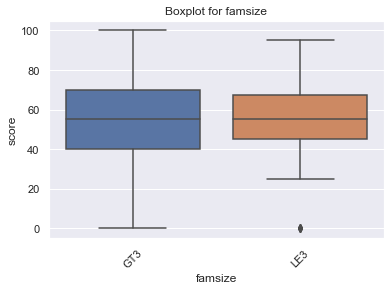

In [18]:
show_box_plot(df, 'famsize', size_x=6)

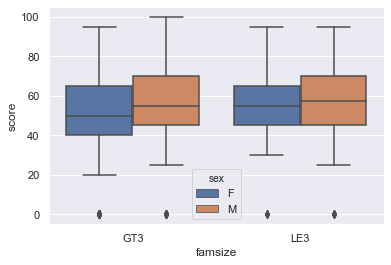

In [19]:
# отдельно у мальчиков и девочек
sns.boxplot(x='famsize', y='score', data=df, hue='sex')

видна небольшая разница у девочек, но она незначительная.

In [20]:
# display(df[df.famsize.isnull()])

##### Варианты для заполнения пропусков.
посмотрим на зависимость признака famsize от Pstatus

In [21]:
# display(df.groupby(['famsize', 'Pstatus']).counter.sum())

In [22]:
fs_df = df.pivot_table(values='counter', index=[
                       'famsize'], columns='Pstatus', aggfunc='count', fill_value=0)
display(fs_df)

Pstatus,A,T
famsize,,
GT3,20,213
LE3,13,81


в принципе можно заполнить пропуски по следующей логике, если родители живут вместе, то famsize = GT3, если раздельно, то famsize = LE3, а если значение Pstatus NaN, то самым часто встречающимся значением

In [23]:
df['famsize'] = df.apply(lambda x: fill_famsize(df, x['famsize'], x['Pstatus']), axis=1)

INFO FOR COLUMN: famsize

Column type: object


count     395
unique      2
top       GT3
freq      285
Name: famsize, dtype: object

Passes (NAN or Empty values): 0



,famsize
GT3,285
LE3,110


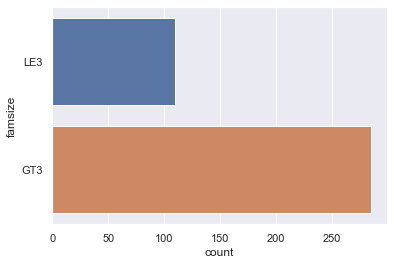

In [24]:
show_column_info(df, 'famsize')

все пропуски заполнены в соответствии с указанной логикой

#### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

INFO FOR COLUMN: Pstatus

Column type: object


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

Passes (NAN or Empty values): 45



,Pstatus
T,314
NaN,45
A,36


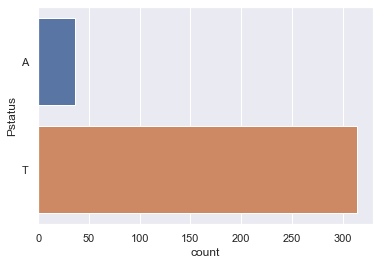

In [25]:
show_column_info(df, 'Pstatus')

признак имеет 45 пропусков. Заполнить их можно по такой же логике как и famszie, только наоборот. Если семья больше 3-х человек, то Pstatus = T, если 3 и меньше, то Pstatus = A

INFO FOR COLUMN: Pstatus

Column type: object


count     395
unique      2
top         T
freq      346
Name: Pstatus, dtype: object

Passes (NAN or Empty values): 0



,Pstatus
T,346
A,49


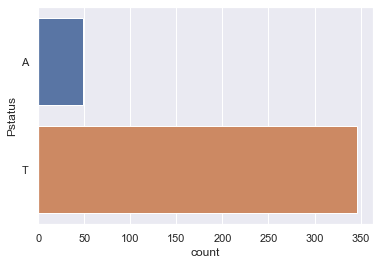

In [26]:
df['Pstatus'] = df.apply(lambda x: fill_pstatus(x), axis=1)
show_column_info(df, 'Pstatus')

пропуски заполнены

#### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

INFO FOR COLUMN: Medu

Column type: float64


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Passes (NAN or Empty values): 3



,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


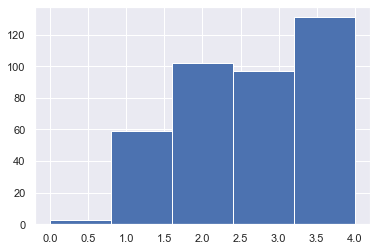

In [27]:
show_column_info(df, 'Medu', bins=5)

признак имеет всего 3 пропуска
посмотрим как влияет образование матери на целевую переменную

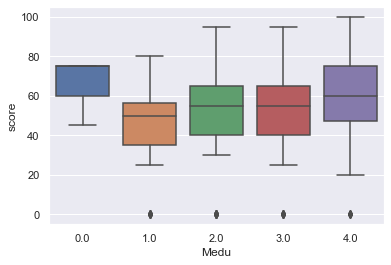

In [28]:
sns.boxplot(x='Medu', y='score', data=df)

похоже, что чем выше образование матери, тем лучше оценки

заполнить пропуски можно либо самым часто встречающимся значением, либо медианным значением. Заполним медианным значением

INFO FOR COLUMN: Medu

Column type: float64


count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Passes (NAN or Empty values): 0



,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


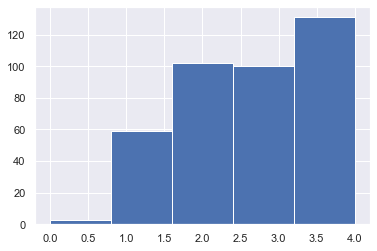

In [29]:
df['Medu'] = df['Medu'].fillna(df['Medu'].median())
show_column_info(df, 'Medu', bins=5)

все 3 пропуска заполнены

#### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

INFO FOR COLUMN: Fedu

Column type: float64


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Passes (NAN or Empty values): 24



,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


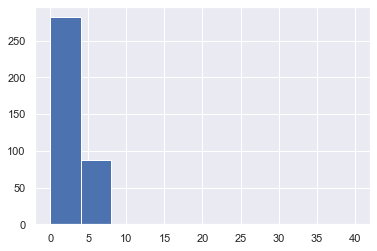

In [30]:
show_column_info(df, 'Fedu')

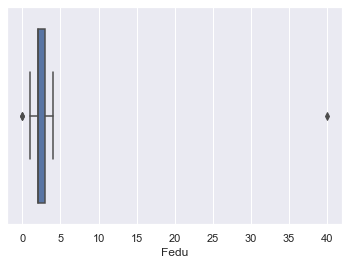

In [31]:
sns.boxplot(df.Fedu)

данный признак содержит 24 пропуска
имеется явный выброс, неверное значение, т.к. по условию этот признак может принимать значения от 0 до 4

In [32]:
df[df['Fedu'] == 40]
display(df['Fedu'].median())

2.0

можно заменить это значение на самое часто встречающееся, на 2 или на медианное значение оно тоже = 2. 
Хотя это может быть ошибкой и вместо 4 было указано 40, поэтому заменим его на 4

In [33]:
df.loc[df['Fedu'] == 40, 'Fedu'] = 4

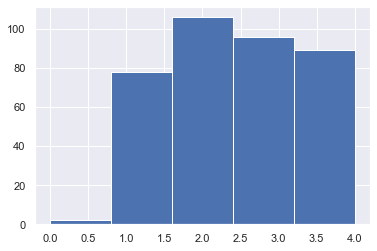

In [34]:
df.Fedu.hist(bins=5)

если псмотреть на значения median и mean для обоих полей, то видно, что образование отца чуть хуже

In [35]:
display(df['Medu'].mean())
display(df['Medu'].median())

2.751898734177215

3.0

In [36]:
display(df['Fedu'].mean())
display(df['Fedu'].median())

2.5175202156334233

2.0

пропуски можно заполнить самым часто встречающимся значением, либо медианой, хотя в данном случае это может быть неверным подходом. Можно использовать следующий подход. Количество мужчин и женщин с образованием 2 и 3 почти равно, и во многих случаях образования обоих родителей совпадают. Хотя в некоторых строках образование матери чуть выше образования отца. Поэтому заполним этот признак так: если профессия отца == teacher, то 4, т.к. ниже при анализе признака Fjob видно, что почти все те кто работает учителем, имеют образование 4, иначе если образование матери = 4, то образование отца = 3, а в остальных слуаях оно будет таким же как и у матери

INFO FOR COLUMN: Fedu

Column type: float64


count    395.000000
mean       2.544304
std        1.061527
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

Passes (NAN or Empty values): 0



,Fedu
3.0,112
2.0,110
4.0,92
1.0,81


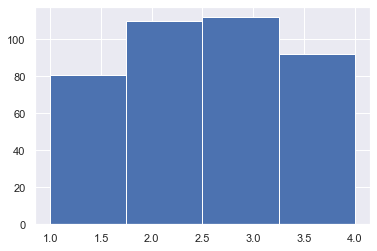

In [37]:
df['Fedu'] = df.apply(lambda x: fill_fedu(x), axis=1)
show_column_info(df, 'Fedu', bins=4)

пропуски заполнены

в целом видно, что мамы чуть более образованнее, чем папы.
Проанализируем влияние образования родителей на целевую переменную score. Создадим новый признак = среднее от двух значений Medu и Fedu (среднее от образования обоих родителей)

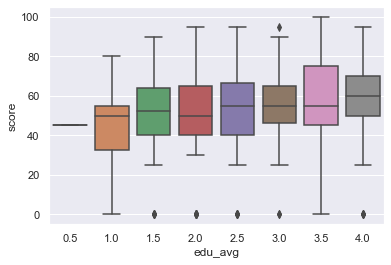

In [38]:
df['edu_avg'] = df.apply(lambda x: x[['Medu', 'Fedu']].mean(), axis=1)
sns.boxplot(x='edu_avg', y='score', data=df)

похоже, что чем образованее родители, тем лучше результаты учеников

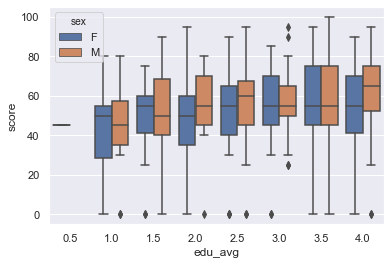

In [39]:
sns.boxplot(x='edu_avg', y='score', data=df, hue='sex')

влияние образования родителей на результат экзамена, прослеживается и у мальчиков и у девочек

#### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

INFO FOR COLUMN: Mjob

Column type: object


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

Passes (NAN or Empty values): 19



,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


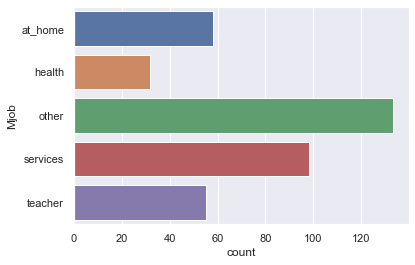

In [40]:
show_column_info(df, 'Mjob')

признак имеет 19 пропусков. Больше всего значений other. По сути можно заменить эти пропуски на самое часто встречающееся значение other, не факт, что это верно, т.к. данный признак может оказывать влияние на целевую переменную, хоть и не сильно выраженное

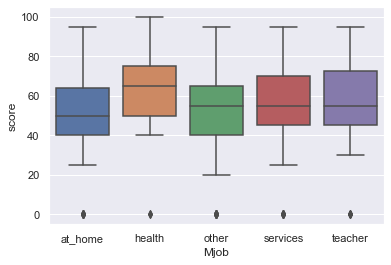

In [41]:
sns.boxplot(x='Mjob', y='score', data=df)

видно, что учащиеся, у которых мамы работают учителями или в сфере здравоохранения, показывают результаты чуть лучше, но общее количество таких учащихся меньше, чем в остальных категориях

#### Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

INFO FOR COLUMN: Fjob

Column type: object


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

Passes (NAN or Empty values): 36



,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


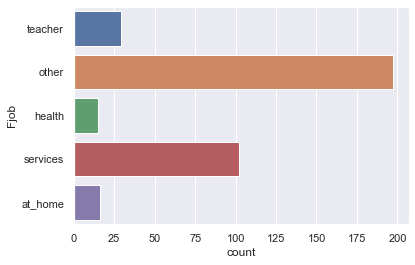

In [42]:
show_column_info(df, 'Fjob')

в колонке Fedu 36 пропусков, которые можно заменить на самое часто встречающееся значение other(здесь то же самое, что и с переменной Mjob, логично правильно сложно заполнить пропуски). Посмотрим на зависимость score от данного признака

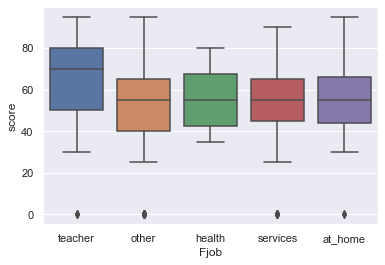

In [43]:
sns.boxplot(x='Fjob', y='score', data=df)

видно, что у тех учащихся, у которых отец работает учителем, результаты лучше, хотя таких учащихся в разы меньше, чем тех, у которых сфера деятельности отца services или other

#### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

INFO FOR COLUMN: reason

Column type: object


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

Passes (NAN or Empty values): 17



,reason
course,137
home,104
reputation,103
other,34
NaN,17


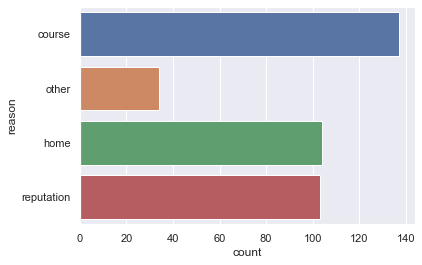

In [44]:
show_column_info(df, 'reason')

в этом признаке имеются 17 пропусков. Можно попробовать заменить на самое часто встречающееся значение, но не факт, что это верно в данном случае. Также можно использовать логику такую, если время в пути до школы(traveltime) 1, то этот признак заполнить значением home (близость к дому)

INFO FOR COLUMN: reason

Column type: object


count      391
unique       4
top       home
freq       277
Name: reason, dtype: object

Passes (NAN or Empty values): 4



,reason
home,277
course,60
reputation,41
other,13
NaN,4


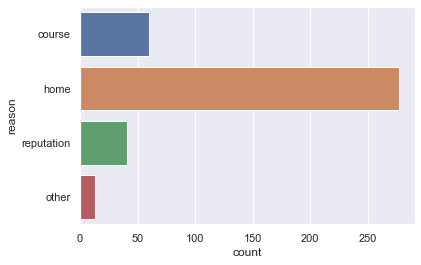

In [45]:
df['reason'] = df.apply(lambda x: 'home' if x['traveltime'] == 1.0 else x['reason'], axis=1)
show_column_info(df, 'reason')

в итоге осталось всего 4 пустых значения

#### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

INFO FOR COLUMN: guardian

Column type: object


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

Passes (NAN or Empty values): 31



,guardian
mother,250
father,86
NaN,31
other,28


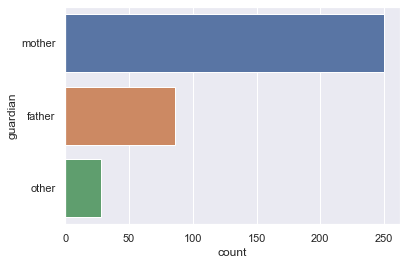

In [46]:
show_column_info(df, 'guardian')

данный признак имеет 31 пропуск. Можно заменить эти пропускт на самое часто встречающееся значение mother

INFO FOR COLUMN: guardian

Column type: object


count        395
unique         3
top       mother
freq         281
Name: guardian, dtype: object

Passes (NAN or Empty values): 0



,guardian
mother,281
father,86
other,28


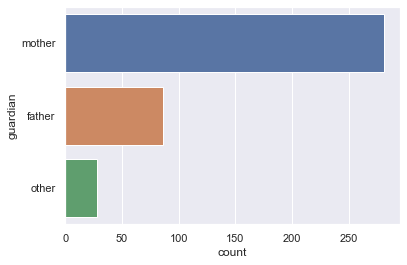

In [47]:
df['guardian'] = df['guardian'].fillna(df['guardian'].mode()[0])
show_column_info(df, 'guardian')

пропусков больше нет

#### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

INFO FOR COLUMN: traveltime

Column type: float64


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Passes (NAN or Empty values): 28



,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


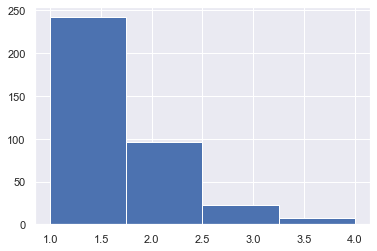

In [48]:
show_column_info(df, 'traveltime', bins=4)

признак имеет 28 пропусков. В основном дети живут в менее чем 15 минутах ходьбы от школы.

##### варианты для заполнения пропусков

можно поступить от обратного как с признаом address. Если учащийся живёт в городе, то установить значение 2, если за городом, то 4. также можно еще смотреть на признак reason, если он равен home, то для городских установить значение 1, а для тех кто за городом 3

INFO FOR COLUMN: traveltime

Column type: float64


count    395.000000
mean       1.498734
std        0.751900
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Passes (NAN or Empty values): 0



,traveltime
1.0,247
2.0,112
3.0,23
4.0,13


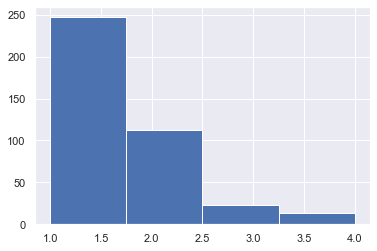

In [49]:
df['traveltime'] = df.apply(lambda x: fill_traveltime(x), axis=1)
show_column_info(df, 'traveltime', bins=4)

пропуски заполнены

#### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

INFO FOR COLUMN: studytime

Column type: float64


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Passes (NAN or Empty values): 7



,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


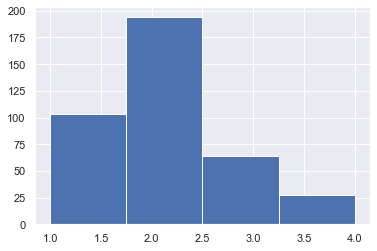

In [50]:
show_column_info(df, 'studytime', bins=4)

признак имеет всего 7 пропусков, заполнить можно самым часто встречающимся значением

In [51]:
df[df['studytime'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,counter,edu_avg
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0,1,3.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,home,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0,1,3.5
112,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,NaN,mother,2.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,1,2.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,home,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0,1,4.0
227,GP,M,17,U,LE3,A,2.0,3.0,services,services,home,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0,1,2.5
266,GP,M,17,U,GT3,T,3.0,1.0,services,NaN,home,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0,1,2.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0,1,1.0


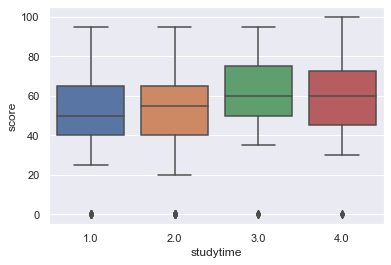

In [52]:
sns.boxplot(x='studytime', y='score', data=df)

видно влияние этого признака на результат сдачи экзамена. Учащиеся, которые тратят больше времени на внеурочные занятия, получают оценки более высокие

#### failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

INFO FOR COLUMN: failures

Column type: float64


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Passes (NAN or Empty values): 22



,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


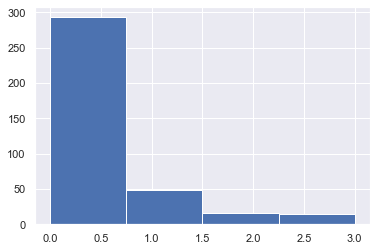

In [53]:
show_column_info(df, 'failures', bins=4)

данный признак имеет 22 пропуска. Можно заменить пропуски на самое часто встречающееся значение 0. Большинство учащихся не имеют внеучебных неудач

#### schoolsup — дополнительная образовательная поддержка (yes или no)

INFO FOR COLUMN: schoolsup

Column type: object


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

Passes (NAN or Empty values): 9



,schoolsup
no,335
yes,51
NaN,9


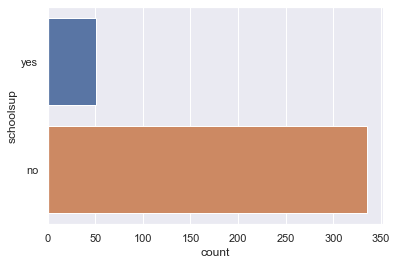

In [54]:
show_column_info(df, 'schoolsup')

видим наличие 9 пропусков. Можно заменить их на самое часто встречающееся значение no. Большинство учащихся не имели дополнительной образовательной поддержки

#### famsup — семейная образовательная поддержка (yes или no)

INFO FOR COLUMN: famsup

Column type: object


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

Passes (NAN or Empty values): 39



,famsup
yes,219
no,137
NaN,39


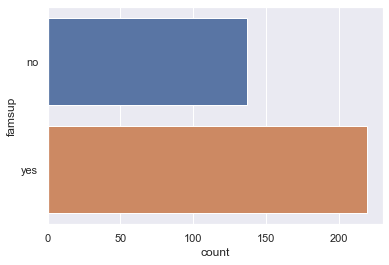

In [55]:
show_column_info(df, 'famsup')

видим большое количество пропусков 39

#### paid — дополнительные платные занятия по математике (yes или no)

INFO FOR COLUMN: paid

Column type: object


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

Passes (NAN or Empty values): 40



,paid
no,200
yes,155
NaN,40


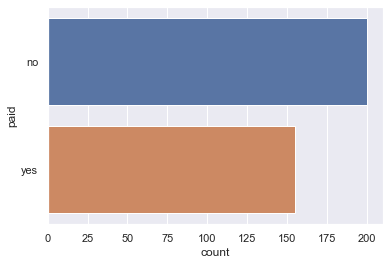

In [56]:
show_column_info(df, 'paid')

признак имеет большое количество пропусков 40

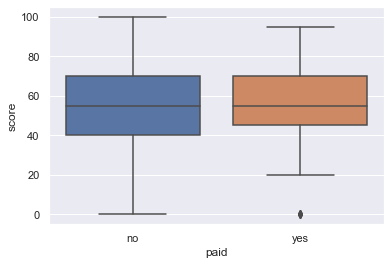

In [57]:
sns.boxplot(x='paid', y='score', data=df)

признак особого влияния на значение score не имеет

#### activities — дополнительные внеучебные занятия (yes или no)

INFO FOR COLUMN: activities

Column type: object


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

Passes (NAN or Empty values): 14



,activities
yes,195
no,186
NaN,14


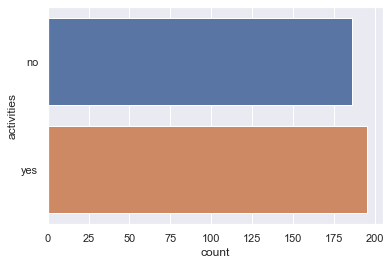

In [58]:
show_column_info(df, 'activities')

видим наличие 14 пропусков. Признак имет почти равное распределение значений

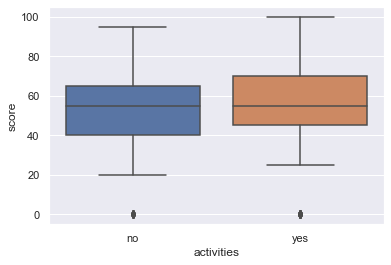

In [59]:
sns.boxplot(x='activities', y='score', data=df)

в целом, те кто занимался дополнительно, показали результаты на экзамене чуть лучше

#### nursery — посещал детский сад (yes или no)

INFO FOR COLUMN: nursery

Column type: object


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

Passes (NAN or Empty values): 16



,nursery
yes,300
no,79
NaN,16


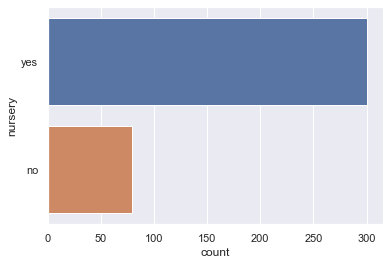

In [60]:
show_column_info(df, 'nursery')

признак имеет 16 пропусков. Можно заполнить их самым часто встречающимся значением yes. Большинство учащихся посещали детский сад

#### studytime, granular

INFO FOR COLUMN: studytime, granular

Column type: float64


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

Passes (NAN or Empty values): 7



,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


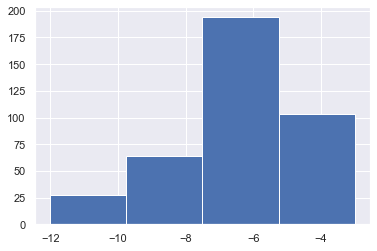

In [61]:
show_column_info(df, 'studytime, granular', bins=4)

имеются 7 пропусков. в описании этого признака нету. Значение = studytime * -3

#### higher — хочет получить высшее образование (yes или no)

INFO FOR COLUMN: higher

Column type: object


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

Passes (NAN or Empty values): 20



,higher
yes,356
NaN,20
no,19


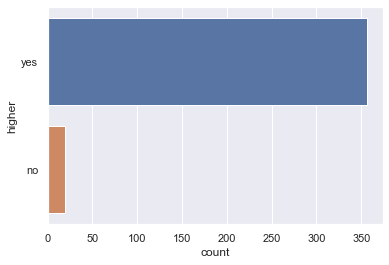

In [62]:
show_column_info(df, 'higher')

признак имеет 7 пропусков. В основном почти все учащиеся хотят получить высшее образование

#### internet — наличие интернета дома (yes или no)

INFO FOR COLUMN: internet

Column type: object


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

Passes (NAN or Empty values): 34



,internet
yes,305
no,56
NaN,34


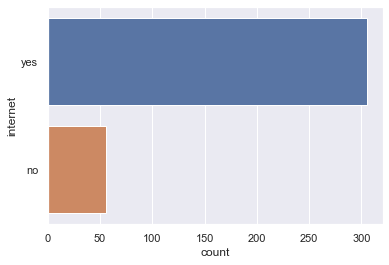

In [63]:
show_column_info(df, 'internet')

в данном признаке есть много просуков 34. У большей части детей есть дома интернет

#### romantic — в романтических отношениях (yes или no)

INFO FOR COLUMN: romantic

Column type: object


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

Passes (NAN or Empty values): 31



,romantic
no,240
yes,124
NaN,31


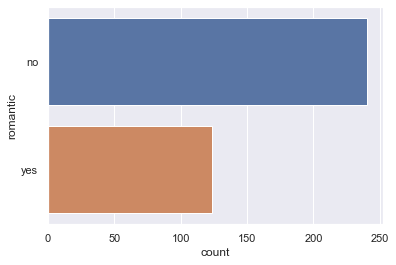

In [64]:
show_column_info(df, 'romantic')

в этом признаке есть 31 пропуск. Треть учащихся состоят в романтических отношениях

In [5]:
# sns.boxplot(x='age', y='sex', data=df, hue='romantic')
# sns.catplot(x='age', y='romantic', data=df)

создадим новый числовой признак, который будет содержать значения 0 и 1. 0 не состоит в романтических отношениях, 1 - состоит

In [6]:
df['romantic_num'] = df['romantic'].apply(convert_to_value)

посмотрим на количество девочек и мальчиков состоящих в романтических отношениях в разном возрасте

In [7]:
pt = pd.pivot_table(df, columns=['age'], index=['sex'], values='romantic_num', aggfunc={'romantic_num':sum}, fill_value=0)
pt

age,15,16,17,18,19,20,21,22
sex,,,,,,,,
F,10,15,24,21,7,1,0,0
M,8,12,10,12,3,0,0,1


видно, что девочки более романтичные особы)

всего девочек и мальчиков в разном возрасте

In [10]:
pt1 = pd.pivot_table(df, columns=['age'], index=['sex'], values='counter', aggfunc={'counter':sum}, fill_value=0)
pt1

age,15,16,17,18,19,20,21,22
sex,,,,,,,,
F,38,54,58,43,14,1,0,0
M,44,50,40,39,10,2,1,1


почти половина девочек в возрасте 17, 18, 19 лет состоят в романтических отношениях. Мальчики менее любвеобильны)

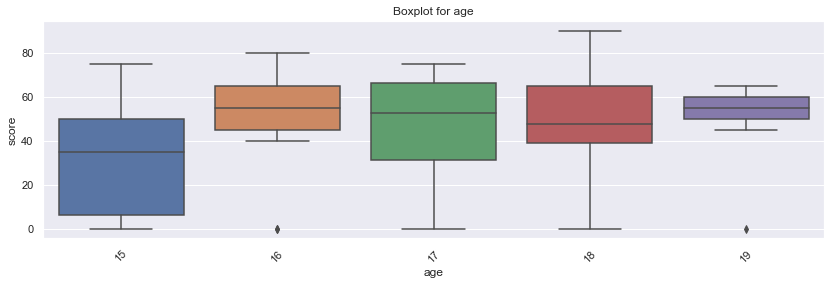

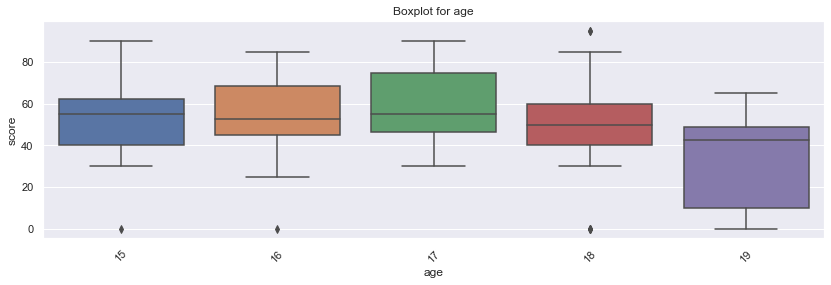

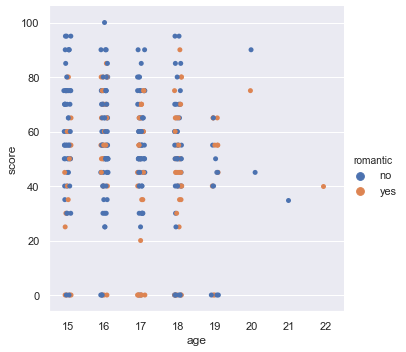

In [69]:
rm1 = df[(df['sex'] == 'F') & (df['romantic'] == 'yes') & (df['age'] < 20)]
# display(rm1)
show_box_plot(rm1, 'age')

rm2 = df[(df['sex'] == 'F') & (df['romantic'] == 'no')]
show_box_plot(rm2, 'age')

sns.catplot(x='age', y='score', hue='romantic', data=df)

на результат по экзамену данный признак особо не не влияет, видна только разница у девочек в возрасте 15 лет

оставим в покое эту интересную тему и продолжим анализ дальше)

#### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

INFO FOR COLUMN: famrel

Column type: float64


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Passes (NAN or Empty values): 27



,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


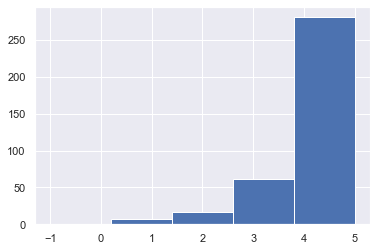

In [70]:
show_column_info(df, 'famrel', bins=5)

признак содержит 27 пропусков. Есть явный выброс = -1. По условию этот признак может принимать значение от 1 до 5. Можно заменить это значение на 1

In [71]:
df.loc[df['famrel'] == -1, 'famrel'] = 1

у большинства учащихся в семье всё очень хорошо

#### свободное время после школы (от 1 - очень мало до 5 - очень мого)

INFO FOR COLUMN: freetime

Column type: float64


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Passes (NAN or Empty values): 11



,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


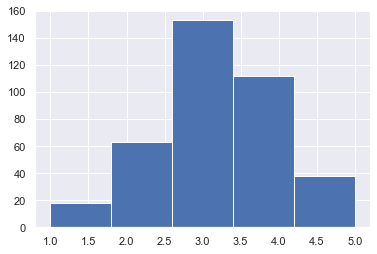

In [72]:
show_column_info(df, 'freetime', bins=5)

признак имеет 11 пропусков. Большинство учащихся имеет среднее количество свободного времени. Пропуски можно заполнить самым часто встречающимся значением

#### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

INFO FOR COLUMN: goout

Column type: float64


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Passes (NAN or Empty values): 8



,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


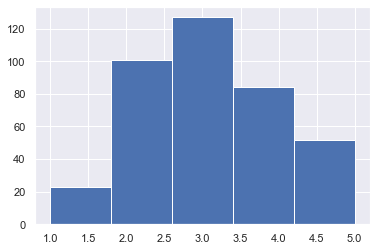

In [73]:
show_column_info(df, 'goout', bins=5)

в этом признаке есть 8 пропусков. Большинство учащихся проводит с друзьями среднее количество времени. Можно заполнить пропуски самым часто встречающимся значением 3, оно же и является медианой

In [74]:
df.goout.median()

3.0

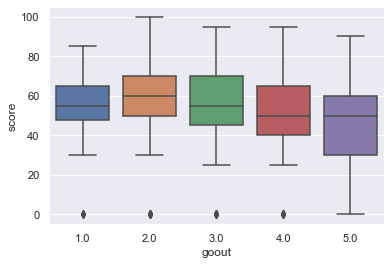

In [77]:
sns.boxplot(x='goout', y='score', data=df)

Видно, что чем больше времени учащиеся проводят с друзьями, тем результат хуже

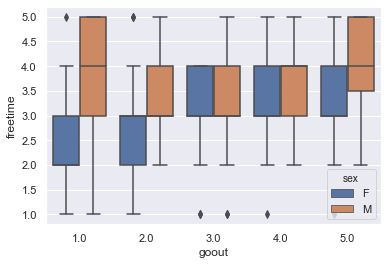

In [85]:
sns.boxplot(x='goout', y='freetime', data=df, hue="sex")

также видно, что с друзьями проводят много времени теучащиеся, у которых много свободного времени. Мальчики чуть больше девочек

#### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

INFO FOR COLUMN: health

Column type: float64


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Passes (NAN or Empty values): 15



,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


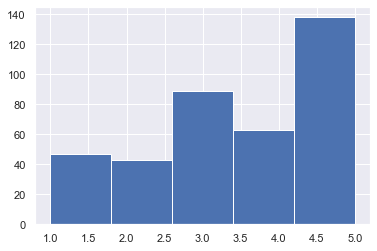

In [88]:
show_column_info(df, 'health', bins=5)

признак имеет 15 пропусков. В основном у учащихся хорошее состояние здоровья. Пропуски можно заполнить медианным значением данного признака = 4 либо самым часто встречающимся значением

In [89]:
df.health.median()

4.0

#### absences — количество пропущенных занятий

INFO FOR COLUMN: absences

Column type: float64


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Passes (NAN or Empty values): 12



,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


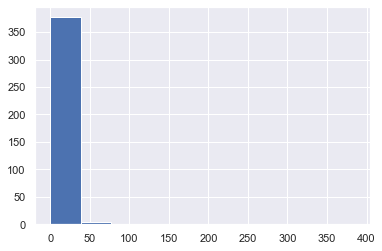

In [90]:
show_column_info(df, 'absences')

признак имеет 12 пропусков. Проверим содержание выбросов

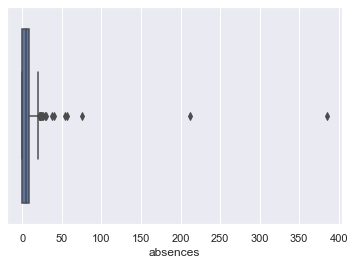

In [11]:
sns.boxplot(df.absences)

отфильтруем значения выбросов по формуле с использованием межквартильного расстояния

25 percentile: 0.0, 75 percentile: 8.0, IQR: 8.0,  Outliers bound: [-12.0, 20.0].


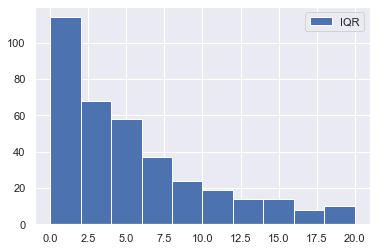

In [12]:
show_iqr_histogram(df, 'absences')

In [13]:
len(df[df['absences'] > 20])

17

всего получилось 17 выбросов, их можно удалить. В целом видно, что ученики очень мало пропускали занятия.

In [14]:
df = df[df['absences'] <= 20]

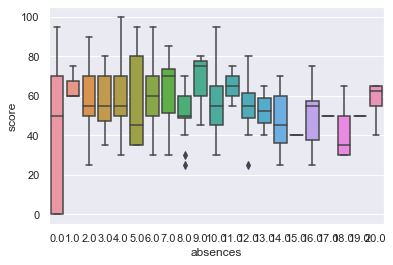

In [15]:
sns.boxplot(x='absences', y='score', data=df[df['absences'] <= 20])

видно, что количество пропусков влияет на итоговую оценку. Чем больше у ученика пропусков, тем оценка хуже

#### score — баллы по госэкзамену по математике

INFO FOR COLUMN: score

Column type: float64


count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Passes (NAN or Empty values): 5



,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


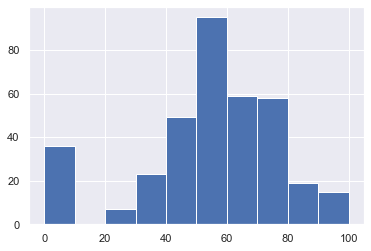

In [96]:
show_column_info(df, 'score')

признак имеет всего 6 пропусков. Такие строки можно удалить. Оценки распределены в диапозоне 0 - 100. Не факт, что 0 означает итоговую оценку, может быть просто такие ученики не сдавали экзамен

### Анализ номинативных переменных

Для некоторых признаков уже рассмотрено их влияние на итоговую оценку. Построим графики для всех номинативных переменных

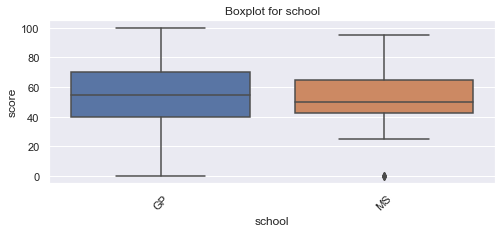

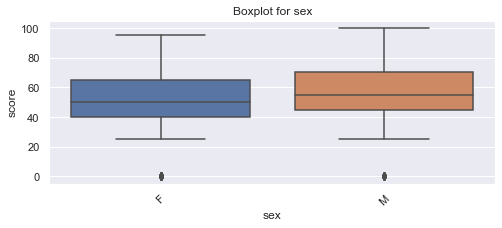

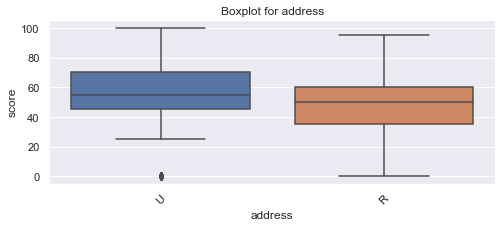

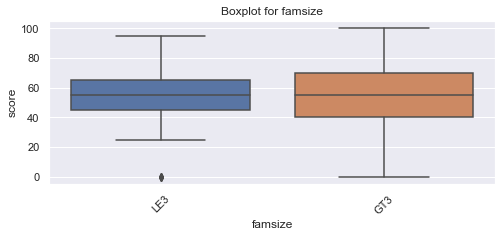

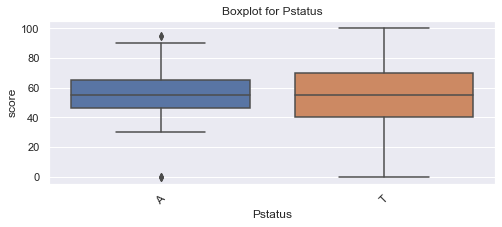

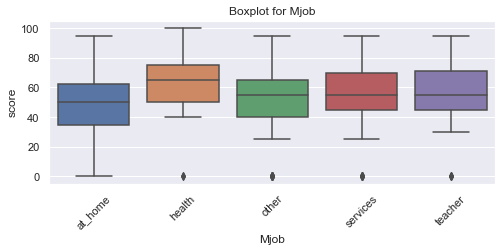

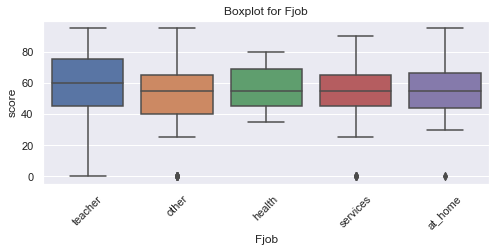

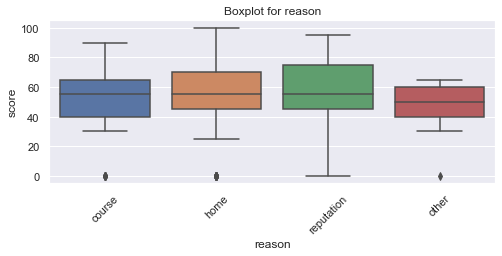

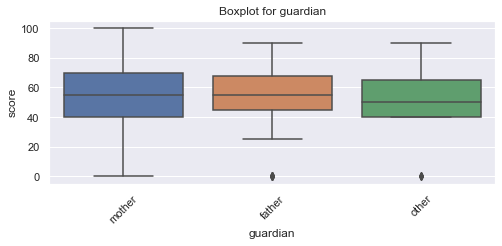

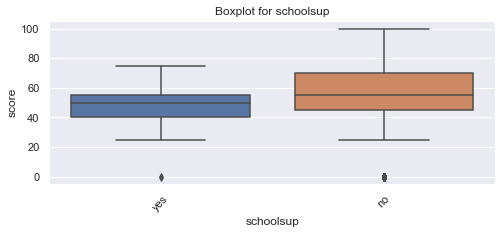

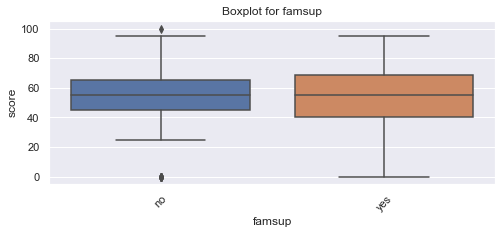

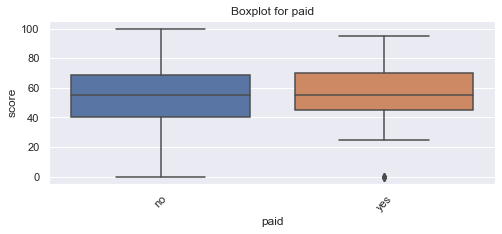

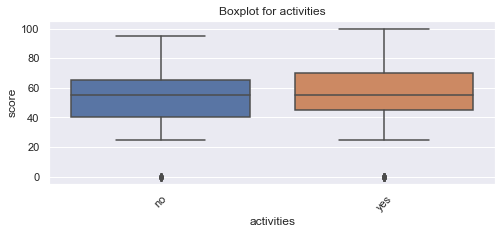

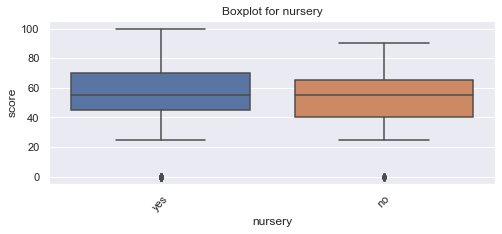

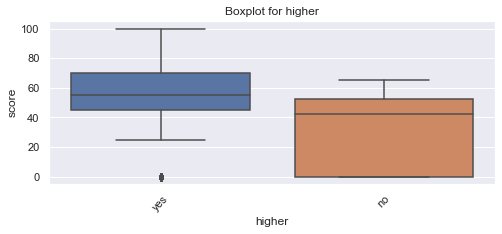

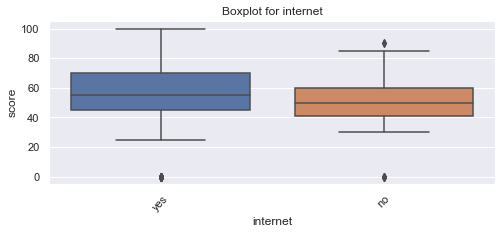

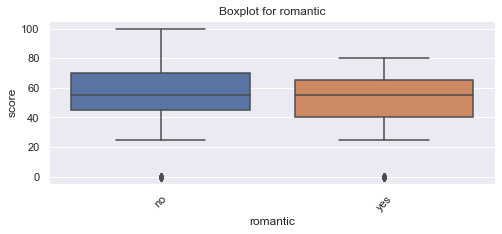

In [97]:
for column in (col for col in df.columns if df[col].dtype == 'object'):
    show_box_plot(df, column, size_x=8, size_y=3)

#### Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
Проверим нулевую гипотезу о том, что распределения итоговых оценок экзамена по различным параметрам неразличимы

In [4]:
for column in (col for col in df.columns if df[col].dtype == 'object'):
    get_stat_dif(df, column)

Found statistical significant difference for column  sex
Found statistical significant difference for column  address
Found statistical significant difference for column  Medu
Found statistical significant difference for column  Fedu
Found statistical significant difference for column  Mjob
Found statistical significant difference for column  studytime
Found statistical significant difference for column  failurs
Found statistical significant difference for column  schoolsup
Found statistical significant difference for column  goout


Видно, что достаточно сильно отличаются 9 параметров: sex, address, Medu, Fedu, Mjob, studytime, failurs, schoolsup, goout

### Корреляционный анализ

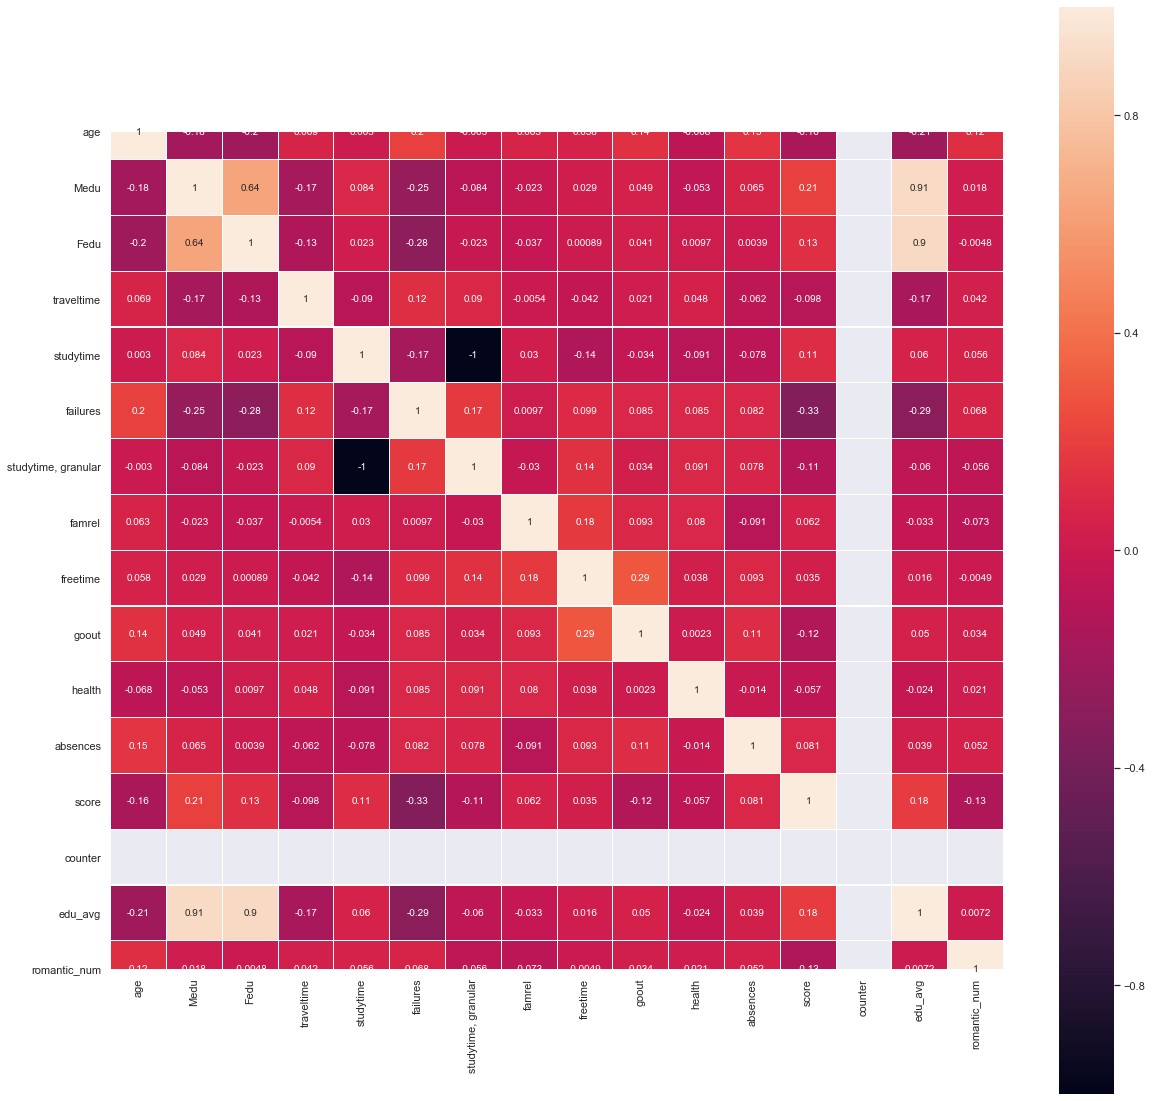

In [99]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=0.1)

In [100]:
# sns.pairplot(df, kind='reg')
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,counter,edu_avg,romantic_num
age,1.000000,-0.181989,-0.203132,0.068568,0.003035,0.195400,-0.003035,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306,NaN,-0.212542,0.123662
Medu,-0.181989,1.000000,0.638706,-0.173175,0.084451,-0.249200,-0.084451,-0.023133,0.028545,0.048867,-0.052777,0.065338,0.206390,NaN,0.908288,0.017574
Fedu,-0.203132,0.638706,1.000000,-0.127197,0.023216,-0.282584,-0.023216,-0.036924,0.000893,0.041376,0.009684,0.003869,0.125718,NaN,0.902026,-0.004800
traveltime,0.068568,-0.173175,-0.127197,1.000000,-0.089611,0.122801,0.089611,-0.005426,-0.042477,0.020872,0.048355,-0.061699,-0.097707,NaN,-0.166312,0.041822
studytime,0.003035,0.084451,0.023216,-0.089611,1.000000,-0.174802,-1.000000,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113,NaN,0.060008,0.055754
failures,0.195400,-0.249200,-0.282584,0.122801,-0.174802,1.000000,0.174802,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542,NaN,-0.293640,0.067942
"studytime, granular",-0.003035,-0.084451,-0.023216,0.089611,-1.000000,0.174802,1.000000,-0.029926,0.136510,0.034197,0.090552,0.078099,-0.113113,NaN,-0.060008,-0.055754
famrel,0.063204,-0.023133,-0.036924,-0.005426,0.029926,0.009730,-0.029926,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516,NaN,-0.032939,-0.072762
freetime,0.058193,0.028545,0.000893,-0.042477,-0.136510,0.098642,0.136510,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952,NaN,0.016496,-0.004866
goout,0.135466,0.048867,0.041376,0.020872,-0.034197,0.085448,0.034197,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246,NaN,0.049984,0.034306


переменные studytime и studytime, granular скоррелированы полностью, одну можно исключить. Удалим из датасета признак studytime, granular

Также видно, что две переменные Medu и Fedu тоже сильно скоррелированы. Думаю, что одну из них исключать не нужно, т.к. вместе они могут оказать более существенное влияние на целевую переменную

### корреляционный анализ числовых переменных

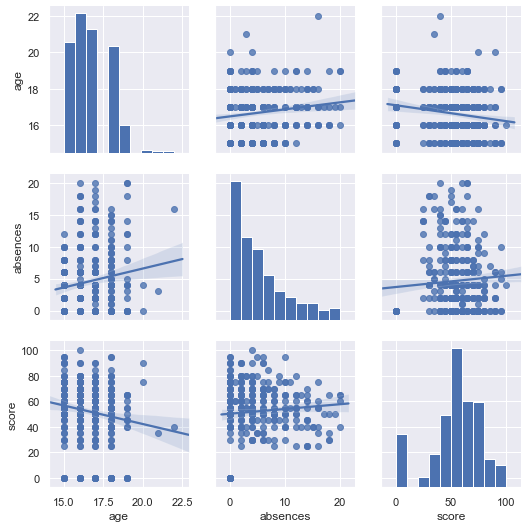

In [17]:
df_num = df[['age', 'absences', 'score']]
sns.pairplot(df_num, kind='reg')

Итак, для дальнейшего построения модели в датасете оставим важные переменные, которые, возможно, оказывают влияние на баллы по экзамену, это: age, sex, address, Medu, Fedu, Mjob, studytime, failurs, schoolsup, goout, absences

## Выводы

- в данных относительно мало пустых значений. Для некоторых признаков непонятно как их заполнять
- выбросы найдены в признаках famrel, fedu, absences
- выводы о важных переменных, которые планируется использовать для построения модели сделаны выше

тут можно конечно ещё раз написать о влиянии различных признаков на предсказываемую величину и описать это немного другими словами, хотя всё это уже говорилось по ходу анализа